In [85]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [86]:
# Read the data and create DataFrame from it
data = pd.read_csv('11.csv', sep=';', decimal=',')

In [87]:
data.head()

,Unnamed: 0,name,area,class,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,436697,22-Dec-2016 13-43-41,100,DZN,75.54,8.2884,-0.393290,-0.656038,68.0,71.0,...,2901.143532,0.913105,1.420585,29.100282,0.867934,2.760527,2.676367,0.334689,-0.004993,0.906250
1,436698,22-Dec-2016 13-43-41,100,DZN,67.59,14.0819,-0.367885,-1.074752,60.0,62.0,...,2228.018342,0.950978,1.391802,6.977909,0.711356,3.481352,2.755186,-0.166114,-0.695810,0.953125
2,436699,22-Dec-2016 13-43-41,100,DZN,60.86,5.3404,0.360231,-0.899669,57.0,58.0,...,1910.459716,0.757815,1.315165,18.677696,0.819770,2.808814,2.735563,1.045370,1.092342,0.984375
3,436700,22-Dec-2016 13-43-41,100,DZN,60.32,60.9776,-0.748717,-0.873833,44.0,47.0,...,1700.315300,1.113652,1.626723,38.558999,1.015338,5.149898,6.853554,0.669685,-0.053380,1.000000
4,436701,22-Dec-2016 13-43-41,100,DZN,75.00,5.2200,-0.090556,-0.474347,70.0,71.0,...,2860.139183,0.738433,1.300173,16.376975,0.858845,2.469800,1.993839,0.061216,-0.683562,0.906250


In [88]:
data[['name', 'class']].head() 

,name,class
0,22-Dec-2016 13-43-41,DZN
1,22-Dec-2016 13-43-41,DZN
2,22-Dec-2016 13-43-41,DZN
3,22-Dec-2016 13-43-41,DZN
4,22-Dec-2016 13-43-41,DZN


In [89]:
data = data.drop('name', axis=1)
y = data.loc[:, data.columns == 'class']
x = data.loc[:, data.columns != 'class']

In [90]:
y.head()

,class
0,DZN
1,DZN
2,DZN
3,DZN
4,DZN


In [91]:
x.head()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,436697,100,75.54,8.2884,-0.393290,-0.656038,68.0,71.0,77.0,80.0,...,2901.143532,0.913105,1.420585,29.100282,0.867934,2.760527,2.676367,0.334689,-0.004993,0.906250
1,436698,100,67.59,14.0819,-0.367885,-1.074752,60.0,62.0,68.0,71.0,...,2228.018342,0.950978,1.391802,6.977909,0.711356,3.481352,2.755186,-0.166114,-0.695810,0.953125
2,436699,100,60.86,5.3404,0.360231,-0.899669,57.0,58.0,61.0,64.0,...,1910.459716,0.757815,1.315165,18.677696,0.819770,2.808814,2.735563,1.045370,1.092342,0.984375
3,436700,100,60.32,60.9776,-0.748717,-0.873833,44.0,47.0,64.0,68.0,...,1700.315300,1.113652,1.626723,38.558999,1.015338,5.149898,6.853554,0.669685,-0.053380,1.000000
4,436701,100,75.00,5.2200,-0.090556,-0.474347,70.0,71.0,75.0,78.0,...,2860.139183,0.738433,1.300173,16.376975,0.858845,2.469800,1.993839,0.061216,-0.683562,0.906250


In [92]:
x.describe()

,Unnamed: 0,area,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,gray_Perc.50%,gray_Perc.90%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
count,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,...,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000
mean,443224.500000,150.585784,96.254364,129.296636,-0.017162,0.280239,79.171262,85.588542,96.884344,105.803385,...,7583.373416,1.117667,1.674840,75.329206,0.946017,4.539982,7.800437,0.538672,0.076441,0.971969
std,3769.086892,54.714008,56.117444,266.620494,0.898016,2.438761,42.945108,48.626013,58.087830,61.667222,...,10411.572775,0.201292,0.227815,151.173722,0.195632,2.058940,10.905071,0.369186,1.011380,0.024650
min,436697.000000,100.000000,34.630000,0.641900,-5.099406,-1.662739,31.000000,33.000000,34.000000,37.000000,...,21.886866,0.519481,0.929611,1.919168,0.442268,1.558813,0.570103,-0.589856,-1.458017,0.828125
25%,439960.750000,100.000000,54.239028,7.767127,-0.381784,-0.792883,48.000000,50.000000,54.000000,60.000000,...,693.818202,0.979165,1.518797,9.965087,0.802260,3.235369,3.053082,0.293227,-0.523740,0.958678
50%,443224.500000,121.000000,73.181187,20.001458,0.027967,-0.352191,65.000000,68.000000,73.000000,79.000000,...,2427.906559,1.072661,1.648122,18.136813,0.900519,3.748919,4.047057,0.503083,-0.153380,0.975309
75%,446488.250000,169.000000,131.255682,73.262298,0.468372,0.338408,101.000000,112.000000,132.000000,147.000000,...,11552.331860,1.221447,1.807004,58.661337,1.060938,5.087449,8.482724,0.733595,0.361828,0.988616
max,449752.000000,400.000000,223.190000,1992.576737,4.031808,32.434843,219.000000,220.000000,223.000000,231.000000,...,52788.693309,1.873434,2.571574,1951.656937,1.650623,17.685676,172.929845,3.266544,15.479892,1.000000


In [93]:
y.describe()

,class
count,13056
unique,5
top,DZN
freq,3252


In [94]:
## Заметим, что у нас 5 уникальных классов. 5 + май = 10

In [95]:
x.columns

Index(['Unnamed: 0', 'area', 'gray_Mean', 'gray_Variance', 'gray_Skewness',
       'gray_Kurtosis', 'gray_Perc.01%', 'gray_Perc.10%', 'gray_Perc.50%',
       'gray_Perc.90%',
       ...
       'b_S(5,-5)SumVarnc', 'b_S(5,-5)SumEntrp', 'b_S(5,-5)Entropy',
       'b_S(5,-5)DifVarnc', 'b_S(5,-5)DifEntrp', 'b_GrMean', 'b_GrVariance',
       'b_GrSkewness', 'b_GrKurtosis', 'b_GrNonZeros'],
      dtype='object', length=938)

In [96]:
# There are several ways to do feature selection. 
# For this purpose sklearn provides SelectKBest class.
from sklearn.feature_selection import SelectKBest, f_classif
# Use feature importance field of the Extra Tree Classifier.
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [97]:
best_features = SelectKBest()
fit = best_features.fit(x.values, y.values)
# Create DataFrame from given data with given columns and indeces
best_features = pd.DataFrame(data=fit.scores_, index=x.columns, columns=['f_classif_score'])
# Sort rows by the absolute value
best_features.nlargest(10, 'f_classif_score')

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f_classif_score
g_Perc.90%,17646.539599
g_Perc.99%,17533.695049
gray_Perc.90%,16585.269447
gray_Perc.99%,16194.558560
"gray_S(3,-3)SumAverg",14213.957720
"gray_S(3,3)SumAverg",14157.915002
"gray_S(4,-4)SumAverg",14154.311224
"g_S(3,-3)SumAverg",14140.844337
"gray_S(2,-2)SumAverg",14119.476909
"gray_S(2,2)SumAverg",14099.986024


In [98]:
model = ExtraTreesClassifier()
model = model.fit(x.values, y.values)

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [99]:
# Create DataFrame from given data with given columns and indeces
best_features = pd.DataFrame(data=model.feature_importances_, index=x.columns, columns=['feature_importance'])

In [100]:
# Sort rows by the absolute value
best_features.nlargest(10, 'feature_importance')

,feature_importance
"g_S(3,-3)SumAverg",0.040689
"b_S(1,0)SumVarnc",0.032645
"r_S(4,-4)SumVarnc",0.025623
b_Mean,0.024771
"g_S(0,4)SumAverg",0.022845
"gray_S(5,-5)SumAverg",0.019803
"g_S(0,3)SumVarnc",0.018946
"b_S(0,2)SumOfSqs",0.018944
"b_S(3,0)SumVarnc",0.018254
"r_S(1,1)SumVarnc",0.017992


In [162]:
# Списки признаков
xSKB = x.loc[:, ['g_Perc.90%','g_Perc.99%','gray_Perc.90%','gray_Perc.99%','gray_S(3,-3)SumAverg','gray_S(3,3)SumAverg','gray_S(4,-4)SumAverg','g_S(3,-3)SumAverg','gray_S(2,-2)SumAverg','gray_S(2,2)SumAverg']]
xETC = x.loc[:, ['g_S(3,-3)SumAverg','b_S(1,0)SumVarnc','r_S(4,-4)SumVarnc','b_Mean','g_S(0,4)SumAverg','gray_S(5,-5)SumAverg','g_S(0,3)SumVarnc','b_S(0,2)SumOfSqs','b_S(3,0)SumVarnc','r_S(1,1)SumVarnc']]

In [163]:
# This is a simple linear classifier trained using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [164]:
model_norm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1., alpha=0.01)

In [165]:
accurSKB = []
accurETC = []
countOfF = []

In [166]:
test = xSKB.iloc[:, :]
countOfF.append(test.shape[1])
scores = cross_val_score(model_norm,(test.values - test.values.mean(axis=0))/test.values.std(axis=0), y.values)
accurSKB.append(scores.mean())
test = xETC.iloc[:, :]
scores = cross_val_score(model_norm,(test.values - test.values.mean(axis=0))/test.values.std(axis=0), y.values)
accurETC.append(scores.mean())

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [167]:
for i in range(2,10,2):
    test = xSKB.iloc[:, :-i]
    countOfF.append(test.shape[1])
    scores = cross_val_score(model_norm,(test.values - test.values.mean(axis=0))/test.values.std(axis=0), y.values)
    accurSKB.append(scores.mean())
    test = xETC.iloc[:, :-i]
    scores = cross_val_score(model_norm,(test.values - test.values.mean(axis=0))/test.values.std(axis=0), y.values)
    accurETC.append(scores.mean())

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [168]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'SelectKBest')

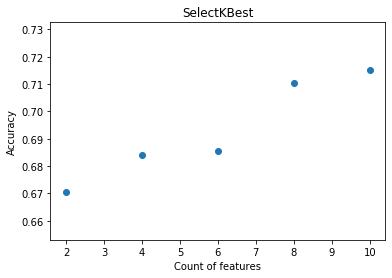

In [169]:
plt.scatter(countOfF,accurSKB)
plt.ylabel("Accuracy")
plt.xlabel("Count of features")
plt.title("SelectKBest")

Text(0.5, 1.0, 'Extra Tree Classifier')

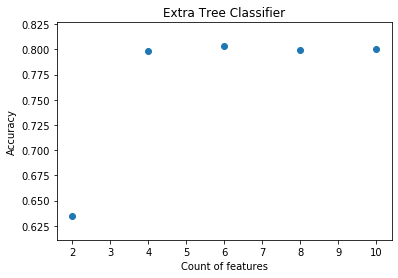

In [171]:
plt.scatter(countOfF,accurETC)
plt.ylabel("Accuracy")
plt.xlabel("Count of features")
plt.title("Extra Tree Classifier")

# Выводы: при поиске значимых признаков с помощью SelectKBest преобладают g_Perc и SumAverg, а при поиске с помощью ExtraTreesClassifier преобладают SumVarnc и SumAverg. Точность классификации выше при использовании признаков Extra Tree Classifier. С уменьшением числа признаков происходит уменьшение точности классификации.  